In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from word2number import w2n
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
from numpy import random
data=pd.read_csv("D:/PYTHON/MachineLearning/DataSets/salary_predict_dataset.csv")
data['experience_null']=np.where(data['Salary']<=20000,'one',np.where(data['Salary']>=40000,'three','two'))
data.experience=data.experience.fillna(data.experience_null)
data['experience']=data['experience'].apply(w2n.word_to_num)
print(data)



imputer  = SimpleImputer(missing_values=np.nan, strategy='median')
ss=data[['test_score']].values.reshape(-1,1)
data['test_score']=imputer .fit(ss)
data['test_score'] = imputer.transform(ss)


imputer1=SimpleImputer(missing_values=np.nan,strategy='median')
ss1=data['interview_score'].values.reshape(-1,1)
data['interview_score']=imputer1.fit(ss1)
data['interview_score']=imputer1.transform(ss1)
data.drop(columns=['experience_null'],inplace=True)


print(data.isnull().sum())                    

    experience  test_score  interview_score  Salary experience_null
0            3         8.0              8.0   50000           three
1            2         5.0              4.0   22000             two
2            3         6.0              5.0   30000             two
3            5         9.0              9.0   55000           three
4            6         3.0              5.0   13000             one
5            1         2.0              1.0    9000             one
6           10         8.0              6.0   48000           three
7            1         1.0              2.0     500             one
8           15         9.0              9.0   60000           three
9           13         7.5              7.5   45000           three
10          10         NaN              5.0   25000             two
11           1         1.0              1.0     500             one
12           1         3.0              6.0   25000             two
13           4         5.0              4.0   36

In [273]:
#salary is the dependent variable which has to be predicted
#testscore(m1), interview score(m2) and experience(m3) are independent variables which help to predict
#Lets predict salary of 2 yrs experience 9 test score and 6 interview score
#y=m1x1+m2x2+m3x3+c
#print(reg.intercept_)
print(reg.coef_)
y=2*reg.coef_[0]+9*reg.coef_[1]+6*reg.coef_[2] + reg.intercept_
print(y)

[ -70.20439343 6142.12700275  948.18331943]
53256.26951406844


In [241]:
reg = LinearRegression()
reg.get_params()
reg.fit(data[['experience','test_score','interview_score']],data.Salary)

LinearRegression()

In [272]:
reg.predict([[2,9,6]])

array([53256.26951407])

In [255]:
#HEnce Both answers are same we computed formulae wise and Function too

In [271]:
print(data)

    experience  test_score  interview_score  Salary
0            3         8.0              8.0   50000
1            2         5.0              4.0   22000
2            3         6.0              5.0   30000
3            5         9.0              9.0   55000
4            6         3.0              5.0   13000
5            1         2.0              1.0    9000
6           10         8.0              6.0   48000
7            1         1.0              2.0     500
8           15         9.0              9.0   60000
9           13         7.5              7.5   45000
10          10         5.0              5.0   25000
11           1         1.0              1.0     500
12           1         3.0              6.0   25000
13           4         5.0              4.0   36000
14           6         5.0              6.0    8000
15          11         9.0              8.0   55000
16          12         9.0              9.0   58000
17           1         2.0              6.0   12000


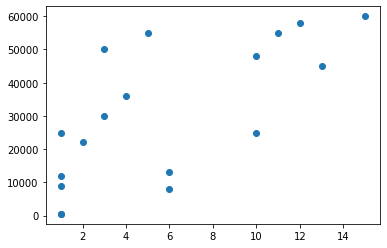

In [276]:
plt.scatter(data['experience'],data['Salary'])

<AxesSubplot:xlabel='interview_score', ylabel='test_score'>

<Figure size 1080x288 with 0 Axes>

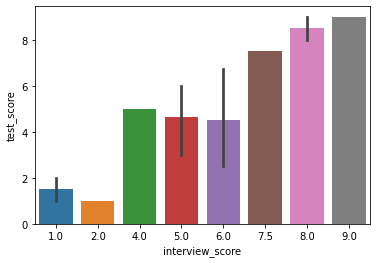

In [315]:
figure=plt.figure(figsize =(15, 4))
ax=plt.subplots()
plt.xlabel('Year of Experience')
plt.ylabel('Salary Expectation')
#plt.bar(x=data['experience'],height=data['Salary'])
#ax.scatter(data['test_score'],data['interview_score'])

#ax = figure.add_subplot(111)
#ax.scatter(data['test_score'],data['interview_score'])
sns.barplot(x=data['interview_score'],y=data['test_score'])


<AxesSubplot:xlabel='experience', ylabel='Salary'>

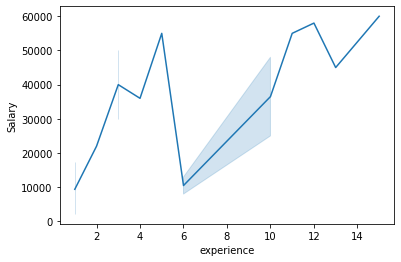

In [312]:
sns.lineplot(x=data['experience'],y=data['Salary'])

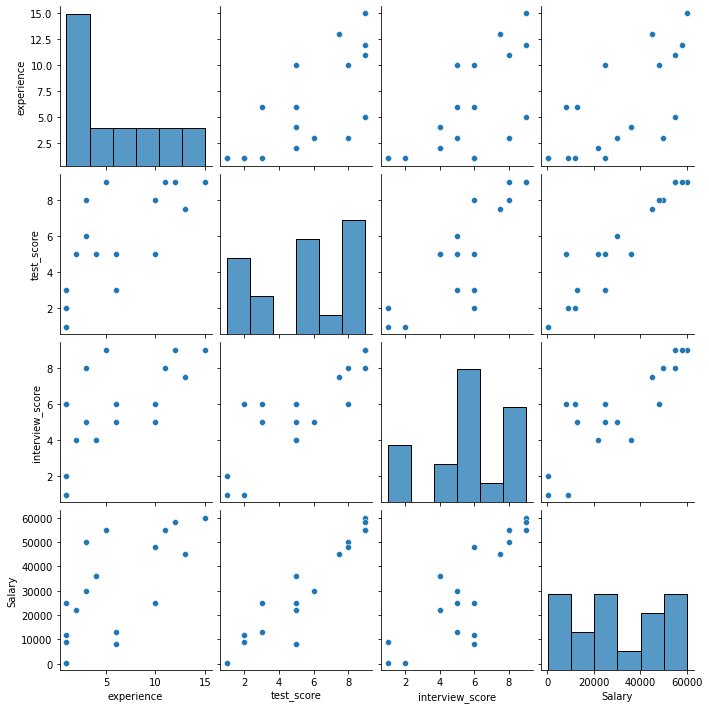

In [314]:
sns.pairplot(data)